In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
cancer = pd.read_csv("Cases/Wisconsin/BreastCancer.csv",index_col=0)

In [6]:
X = cancer.drop("Class",axis=1)
y = cancer['Class']

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


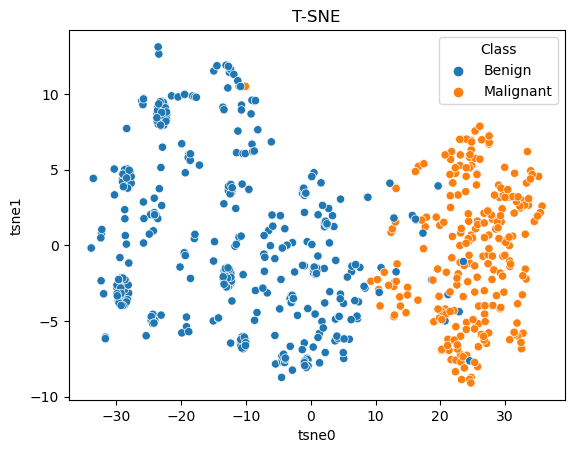

In [7]:
tsne = TSNE(random_state=23,perplexity=40).set_output(transform='pandas')

X_tsne = tsne.fit_transform(X)

tsne_pd = pd.concat([X_tsne,y],axis =1)
sns.scatterplot(data=tsne_pd,x='tsne0',y='tsne1',hue='Class')
plt.title("T-SNE")
plt.show()

In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.svm import SVC


In [15]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state = 23)

scores =[]
perplex = [5,15,30,35,45,50]

for i in perplex:
    tsne = TSNE(random_state=23,perplexity=i)
    X_tsne = tsne.fit_transform(X)
    svm = SVC(kernel='linear')
    params ={}
    gcv = GridSearchCV(svm,param_grid=params,cv=kfold)
    gcv.fit(X_tsne,y)
    scores.append(gcv.best_score_)

print("best Score",np.max(scores))
print("best perplexity",perplex[np.argmax(scores)])


best Score 0.9656526207605344
best perplexity 35


HR analytics

In [17]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



In [24]:
hr = pd.read_csv("Cases/human-resources-analytics/HR_comma_sep.csv",index_col=0)
X = pd.get_dummies(hr.drop('left',axis = 1))
y = pd.DataFrame(hr['left'])

In [25]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state = 23)

scores =[]
perplex = [5,15,30,35,45,50]

for i in perplex:
    tsne = TSNE(random_state=23,perplexity=i)
    X_tsne = tsne.fit_transform(X)
    svm = SVC(kernel='rbf')
    params ={}
    gcv = GridSearchCV(svm,param_grid=params,cv=kfold)
    gcv.fit(X_tsne,y)
    scores.append(gcv.best_score_)

print("best Score",np.max(scores))
print("best perplexity",perplex[np.argmax(scores)])

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import cross_val_score
for i in perplex:
    tsne = TSNE(random_state=23,perplexity=i)
    X_tsne = tsne.fit_transform(X)
    svm = SVC(kernel='linear')
    results = cross_val_score(svm,X_tsne,y,cv=kfold,verbose=3)
    scores.append(results)